In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression
---
Say we are doing a classic perdiction task, where given a input vector with $n$ variables: 

$$ x = (x_1, x_2, ..., x_n)$$

And to predict 1 response variable $y$ (may be the sales of next year, the house price, etc.), the simplest form is to use a linear regression to do the prediction with the formula:

$$ y = W^{T}x + b$$

Where $W$ is a column vector with $n$ dimension. Say now our question changed a bit, we hope to predict a probability, like what's the probability of raining tomorror? In this sense, this linear regression might be a little unfit here, as a linear expression can be unbounded and our probability is ranged in $[0, 1]$.

---
## Sigmoid Function
---
To bound our prediction in $[0, 1]$, the widely used technic is to apply a $sigmoid$ function:

$$ z = \sigma(x) = \frac{1}{1+\exp^{-x}}$$

With `numpy` we can easily visualize the function.

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

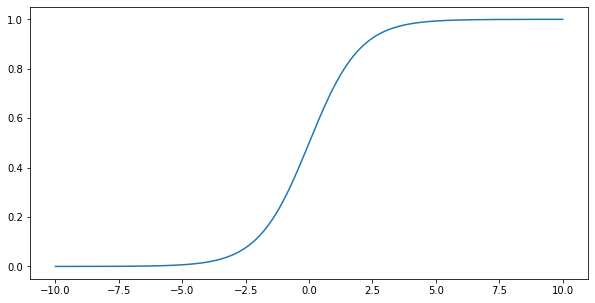

In [3]:
plt.figure(figsize=[10, 5])
x = np.linspace(-10, 10, 2000)
y = sigmoid(x)

plt.plot(x, y)

## Loss Function
---
The definition of loss function of logistic regression is defined as:

$$ L(\hat{y}, y) = - [ylog\hat{y} + (1 - y)log(1 - \hat{y})]$$

Where $\hat{y}$ is our prediction ranging from $[0, 1]$ and $y$ is the true value. When the actual value is $y = 1$, the equation becomes:

$$L(\hat{y}, y) = - ylog\hat{y} $$

the closer $\hat{y}$ to 1, the smaller our loss is. And the same goes for $y = 0$

## Formula of One Input
---
Now to put everything together, for an given input $x = (x_1, x_2, ..., x_n)$ (with $n$ features), the forward path of logistic regression would be:

$$ z = W^Tx + b$$

$$ \hat{y} = \sigma{(z)}$$

$$ L(\hat{y}, y) = - [ylog\hat{y} + (1 - y)log(1 - \hat{y})]$$

## Gradient Descent
---
Given this actual value $y$, we hope to minimize the loss $L$, and the technic we are going to apply here is gradient descent(the details has been illustrated in many articles), bascically what we need to do is to apply derivative to our variables and move the them slightly to down to the optimum.

Here we have 2 variables, $W$ and $b$, and for this example, the update formula of them would be:

$$W = W - \frac{dL}{dW}$$

$$b = b - \frac{dL}{db}$$

Where $W$ is a column vector with $n$ weights correpond to the $n$ dimension of $x^{(i)}$. In order to get the derivative of our targets, chain rules would be applied:

$$\frac{dL}{dW} = \frac{dL}{d\hat{y}} \times \frac{d\hat{y}}{dz} \times \frac{dz}{dW} = (\hat{y} - y)x$$

$$\frac{dL}{db} = \frac{dL}{d\hat{y}} \times \frac{d\hat{y}}{dz} \times \frac{dz}{db} = (\hat{y} - y)$$

You can try out the deduction on your own, the only tricky part is the derivative of `sigmoid` function, for a good explanation you can refer to [here](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x).

## Batch Training
---
The above gives the forward and backward updating process, which is well enough to implement a logistic regression if we were to feed in our training model *ONE AT A TIME*. However, in most training cases, we don't do that. Instead training samples are feed in batches, and the backward propogation is updated with average loss of the batch.

Which means that for a model that feed with `m` samples at a time, the loss function would be:

$$J(W, b) = \frac{1}{m}\sum_i{L(\hat{y}^{(i)}, y^{(i)})}$$

Where $i$ denotes the $ith$ training sample.

## Forward Propogation of Batch Training
---
Now instead of using $x$, a single vector, as our input, we specify a matrix $X$ with size $n \times m$, where as above, $n$ is the number of features and $m$ is number of training samples (basically, we line up $m$ training samples in a matrix). Now the formula becomes:

$$ Z = W^TX + b \tag1$$

$$ \hat{Y} = \sigma{(Z)} \tag2$$

$$ L(\hat{Y}, Y) = - [Ylog\hat{Y} + (1 - Y)log(1 - \hat{Y})] \tag3$$

$$J(W, b) = \frac{1}{m}\sum_i{L(\hat{y}^{(i)}, y^{(i)})} \tag4$$

Note that here we use *UPPER LETTER* to denote our matrix and vectors (a caveat is that $b$ here is still a single value, the more formal way would be to represent $b$ as a vector, but in `python` the addition of a single value to a matrix would be automated broadcasted). 

Let's break down the size of the matrices one by one. 

In equation $(1)$, $W^T$ is a $1 \times n$ matrix, $X$ is a $n \times m$ matrix, so $Z$ is a $1 \times m$ matrix

In equetion $(2)$, applying directly the $sigmoid$ function to $Z$ would leave $\hat{Y}$ still a $1 \times m$ matrix

In equetion $(3)$, the actual value matrix $Y$ is a $1 \times m$ matrix, and all operations are element wise, so $L$ would still be a $1 \times m$ matrix

In the last equation, $J$ would be a single value denoting the loss of that batch

## Backward Propagation of Batch
---
Now give our new targe $J$, our derivative of variable $W$ and $b$ would be:

$$ \frac{dJ}{dW} = \frac{dJ}{dL} \times \frac{dL}{dW} = \frac{1}{m}X(\hat{Y} - Y)^T$$

$$ \frac{dJ}{db} = \frac{dJ}{dL} \times \frac{dL}{db} = \frac{1}{m}\sum_i{(\hat{y}^{(i)} - y^{(i)})}$$

Where $\frac{dJ}{dW}$ is $1 \times n$ vector and $\frac{dJ}{db}$ is a single value

## Generate Classification Task
---
Our formula stuff ends here, let's implement our algorithm, before that some data needs to be generated to make a classification task.

In [4]:
from sklearn import datasets

In [5]:
X, y = datasets.make_classification(n_samples=1000, random_state=123)

X_train, X_test = X[:700], X[700:]
y_train, y_test = y[:700], y[700:]

In [6]:
print('train shape', X_train.shape)
print('test shape', X_test.shape)

train shape (700, 20)
test shape (300, 20)


# Implementation
---
Now everything is set, let's go for the implementation.

## Helper Functions
---
- sigmoid function that take in an array
- weight function that initialize of $W$ and $b$ to zeros
- accuracy function to measure our accuracy of binary prediction

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


def init_weights(dim):
    W = np.zeros((dim, 1))
    b = 0
    return W, b

def accuracy(y_pred, y_true):
    y_pred, y_true = np.squeeze(y_pred), np.squeeze(y_true)
    assert y_pred.shape == y_true.shape
    y_pred = np.array([1 if i > 0.5 else 0 for i in y_pred])
    return 1 - np.sum(np.abs(y_pred - y_true))/len(y_true)

In [8]:
W, b = init_weights(10)

print(W.shape, b)

pred = np.array([0.2, 0.4, 0.7, 0.9])
true = np.array([0, 1, 1, 0])
acc = accuracy(pred, true)
print(acc)

(10, 1) 0
0.5


## Predict
---
Our `predict` function would be simply going through the forward process given trained weights

In [9]:
def predict(X, W, b):
    Z = np.dot(W.T, X) + b
    Y_hat = sigmoid(Z)
    return Y_hat

## Train
---
Notice that for the `train` function, the input shape of $X$ needs to have shape of $n \times m$, and $Y$ with shape of $1 \times m$, where $m$ is the batch size.

In [10]:
def train(X, Y, learning_rate=0.01, iterations=1000, verbose=False):
    """
    X: shape of n x m (n features and m samples)
    y: shape 1 x m
    """
    n = X.shape[0]
    m = X.shape[1]
    W, b = init_weights(n)
    assert W.shape == (n, 1)
    assert Y.shape == (1, m)
    
    losses = []
    for i in range(iterations):
        Z = np.dot(W.T, X) + b
        Y_hat = sigmoid(Z)
        assert Y_hat.shape == (1, m)

        loss = -1/m * np.sum((Y*np.log(Y_hat) + (1-Y)*np.log(1 - Y_hat)))
        losses.append(loss)
        
        dW = np.dot(X, (Y_hat - Y).T)/m
        db = np.mean(Y_hat - Y)
        
        W -= dW
        b -= db
        
        if verbose and i % 100 == 0:
            print(f'round {i}: loss {loss}')
            
    return {'W': W, 'b': b, 'loss': losses}

The input need to transpose in order to fit in our training requirements.

In [11]:
X = X_train.T
Y = y_train.reshape(1, -1)

print('X shape', X.shape)
print('Y shape', Y.shape)

X shape (20, 700)
Y shape (1, 700)


In [12]:
model = train(X, Y, learning_rate=0.01, iterations=500, verbose=True)

round 0: loss 0.6931471805599454
round 100: loss 0.13913472257785545
round 200: loss 0.13580982295749638
round 300: loss 0.13516585548864551
round 400: loss 0.13499557852028424


In [13]:
W = model['W']
b = model['b']

y_pred = predict(X_test.T, W, b)
y_true = y_test.reshape(1, -1)

In [14]:
acc = accuracy(y_pred, y_true)
print('accuracy {:.2f}%'.format(acc*100))

accuracy 94.00%


## Ensemble in a Class
---
Now let's ensemble everything into a class to look more structured. For completeness, a batched training would also be implemented

In [15]:
class LogisticRegression:
    def __init__(self):
        self.W = 0
        self.b = 0
        self.losses = []
    
    @staticmethod
    def sigmoid(x):
        return 1/(1 + np.exp(-x))

    @staticmethod
    def init_weights(dim):
        W = np.zeros((dim, 1))
        b = 0
        return W, b
    
    @staticmethod
    def accuracy(y_pred, y_true):
        y_pred, y_true = np.squeeze(y_pred), np.squeeze(y_true)
        assert y_pred.shape == y_true.shape
        y_pred = np.array([1 if i > 0.5 else 0 for i in y_pred])
        return 1 - np.sum(np.abs(y_pred - y_true))/len(y_true)
    
    def train(self, X_train, y_train, batch_size=32, learning_rate=0.01, 
              iterations=1000, verbose=False, print_every_n=10):
        """
        Notice that trainig samples need to transpose first
        X: shape of n x m (n features and m samples)
        y: shape 1 x m
        """
        X = X_train.T
        Y = y_train.reshape(1, -1)

        n = X.shape[0]
        m = X.shape[1]
        self.W, self.b = self.init_weights(n)
        assert self.W.shape == (n, 1)
        assert Y.shape == (1, m)
        
        ind = range(m)
        batch_indices = [ind[i:(i+batch_size)] for i in range(0, m, batch_size)]
        for i in range(iterations):
            for b_ind in batch_indices:
                X_batch = X[:, b_ind]
                Y_batch = Y[:, b_ind]
                
                Z = np.dot(self.W.T, X_batch) + self.b
                Y_hat = self.sigmoid(Z)

                loss = -1/m * np.sum((Y_batch*np.log(Y_hat) + (1-Y_batch)*np.log(1 - Y_hat)))
                self.losses.append(loss)

                dW = np.dot(X_batch, (Y_hat - Y_batch).T)/m
                db = np.mean(Y_hat - Y_batch)

                self.W -= dW
                self.b -= db

            if verbose and i % print_every_n == 0:
                print(f'round {i}: loss {loss}')

    def predict(self, X_test):
        X = X_test.T
        Z = np.dot(self.W.T, X) + self.b
        Y_hat = self.sigmoid(Z)
        return Y_hat

In [16]:
clf = LogisticRegression()
clf.train(X_train, y_train, batch_size=256, learning_rate=0.005, iterations=20, verbose=True)

round 0: loss 0.14106878936795533
round 10: loss 0.060319532142015464


Text(0, 0.5, 'loss')

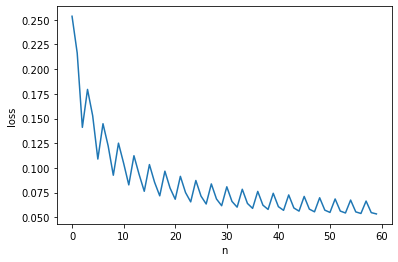

In [17]:
loss = clf.losses
plt.plot(range(len(loss)), loss)
plt.xlabel('n')
plt.ylabel('loss')

In [18]:
y_pred = clf.predict(X_test)
y_true = y_test.reshape(1, -1)

acc = clf.accuracy(y_pred, y_true)
print('accuracy {:.2f}%'.format(acc*100))

accuracy 94.00%
